<a href="https://colab.research.google.com/github/arpitamohanty1991/Clustering-of-Countries/blob/master/Copy_of_Untitled14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
# Dataset is now stored in a Pandas Dataframe

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#Get the column names
print([i for i in data.columns]) #Here we could have simply done data.columns, but it would have returned a slightly different output. Index and object type additional informatinon.

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Time is basically the number of seconds elapsed between a transaction and the first transaction in the dataset. We will leverage this to build a time based model.

In [11]:
#Get high level statistical view of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


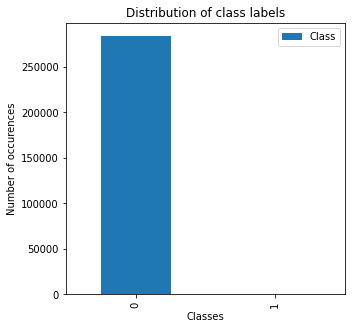

In [12]:
#Check the class distribution in the given data
data['Class'].value_counts().plot(figsize=(5,5),kind='bar',legend='True')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

In [13]:

#Get percentage fradulent information
not_fraud=data[data['Class']==0].shape[0]
fraud=data[data['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

Percentage of Fradulent transaction: 0.1727
Percentage of Non Fradulent transaction: 99.8273


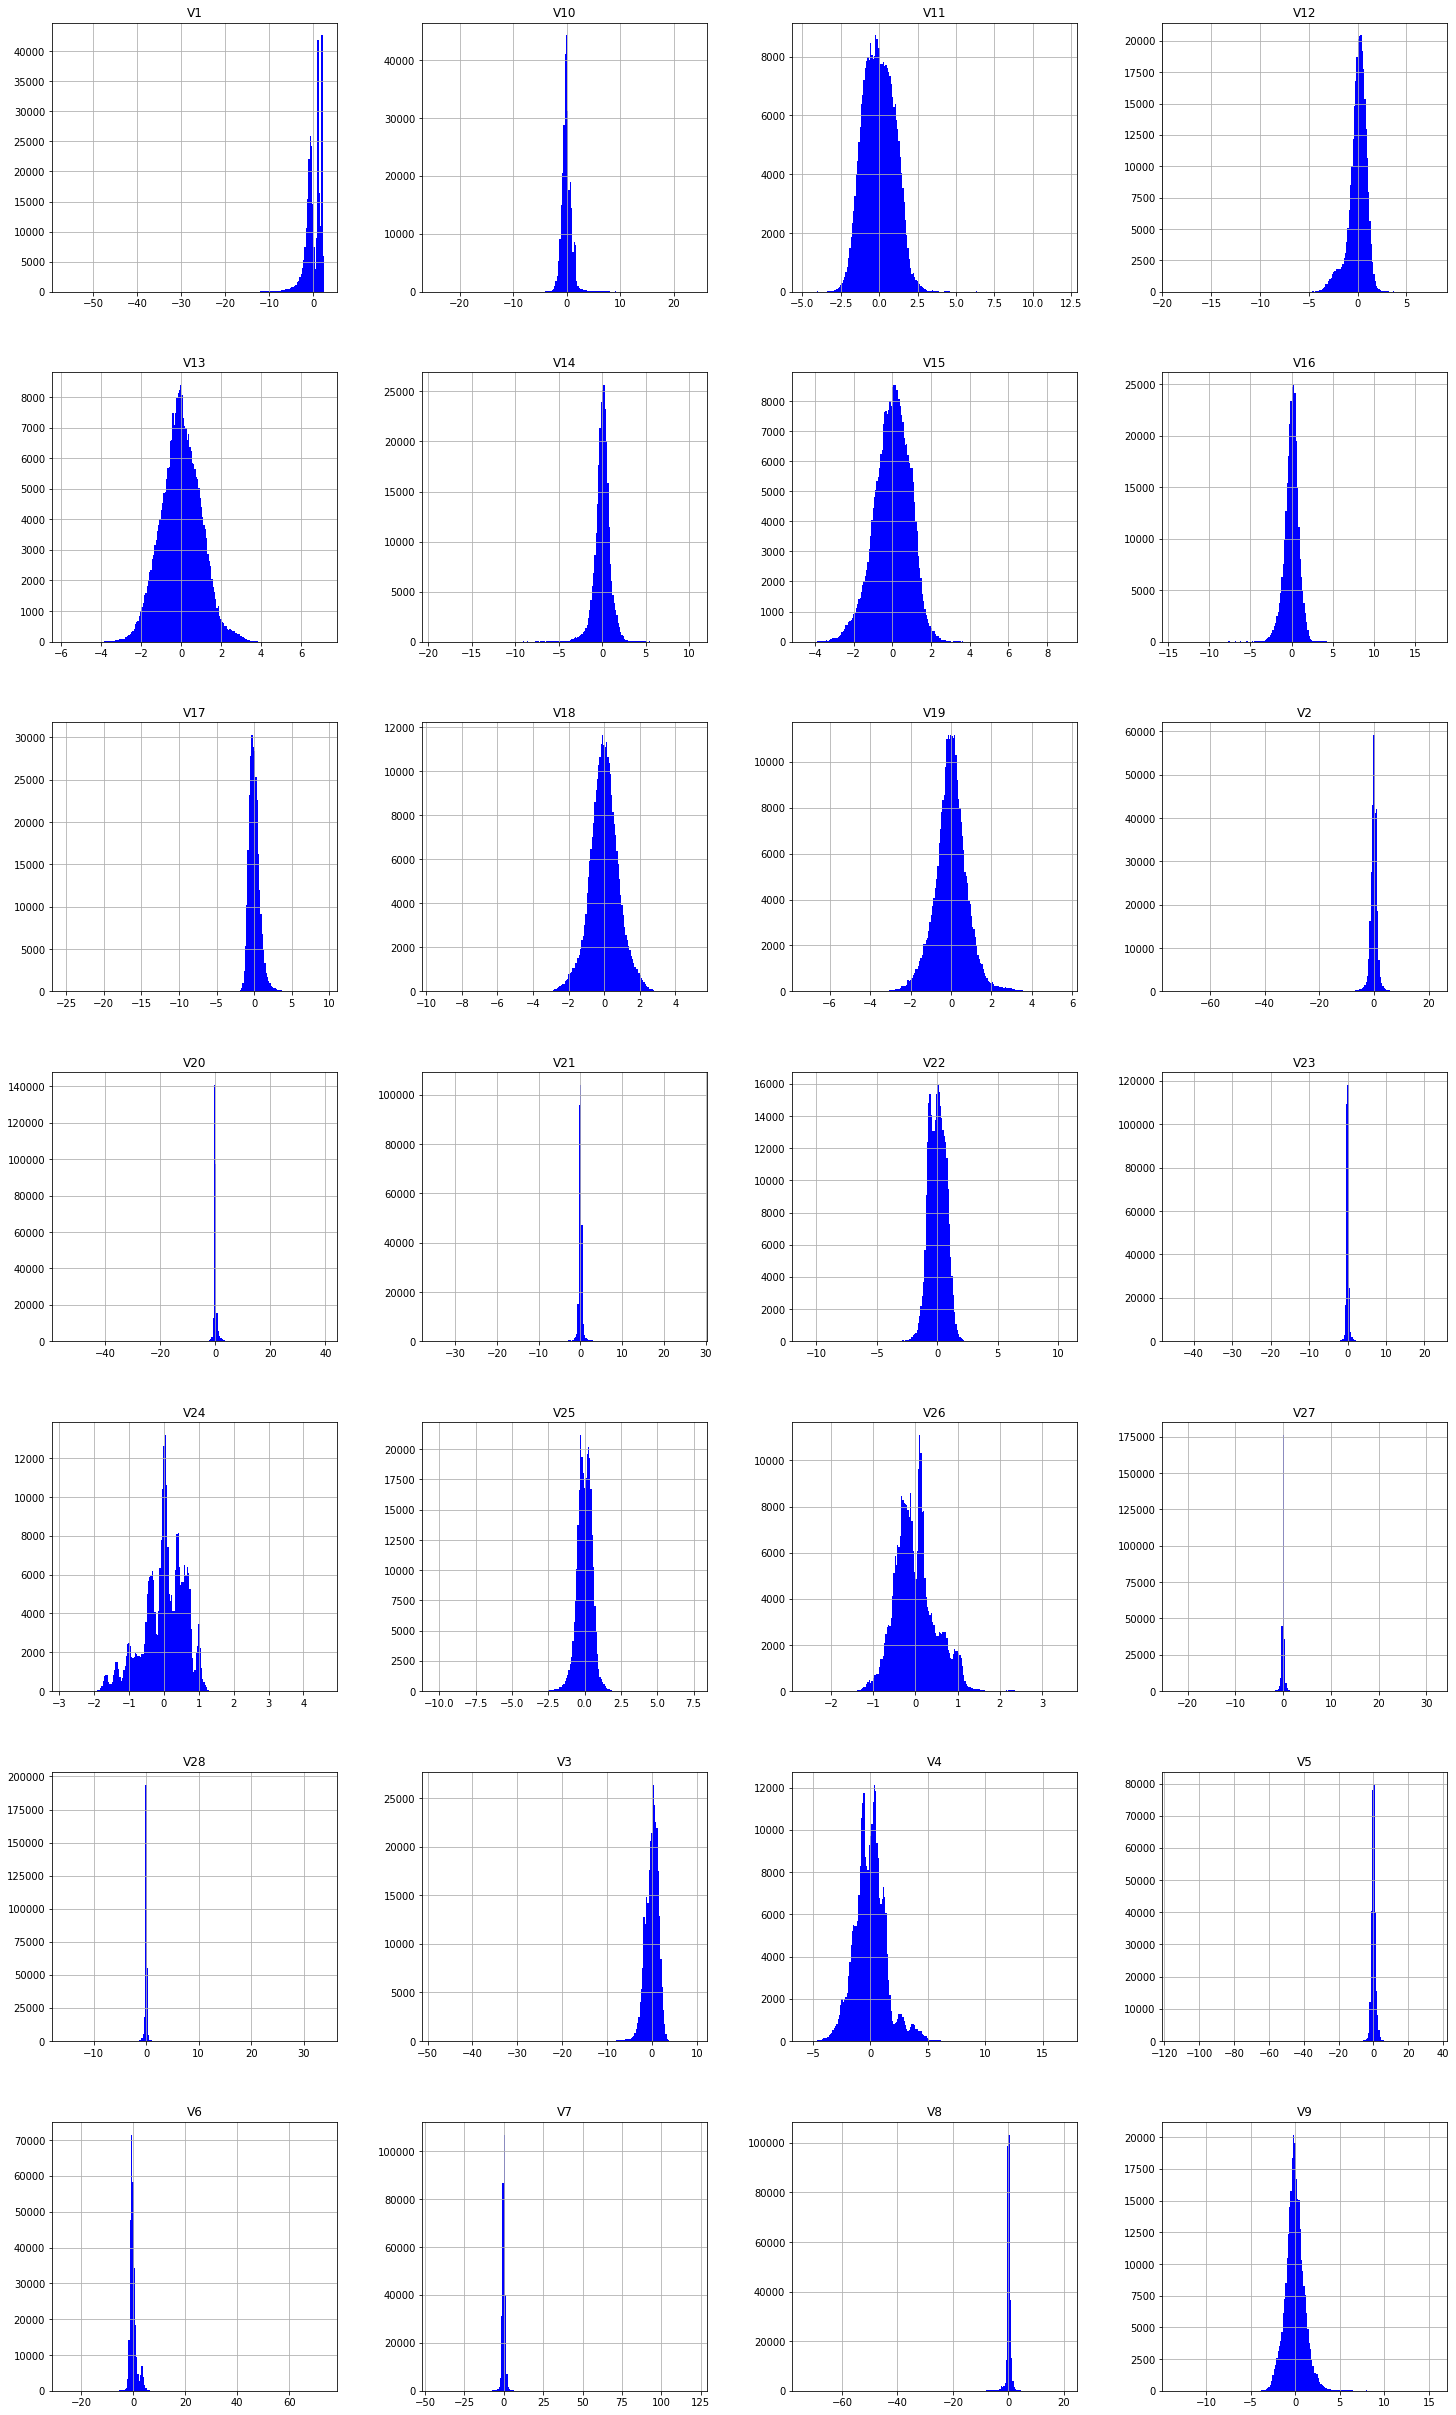

In [14]:
#Check the distribution of all the independent variables
data.drop(['Class','Amount','Time'],axis=1).hist(bins=200,color='blue',figsize=(25,50),layout=(8,4))
plt.show()

By looking at the distribution of all the features we can see that there are some features whose distributions are skewed to the left, there are some features whose distributions are skewed to the right and there are some features which appears to have a normal gaussian distribution. Almost all the features have their distributions mean at 0. Some features like V11, V15, V13, V18, V19 has a wider spread compared to other features. Some features like V6, V7, V8 and V28 have a very low spread as compared to other features.

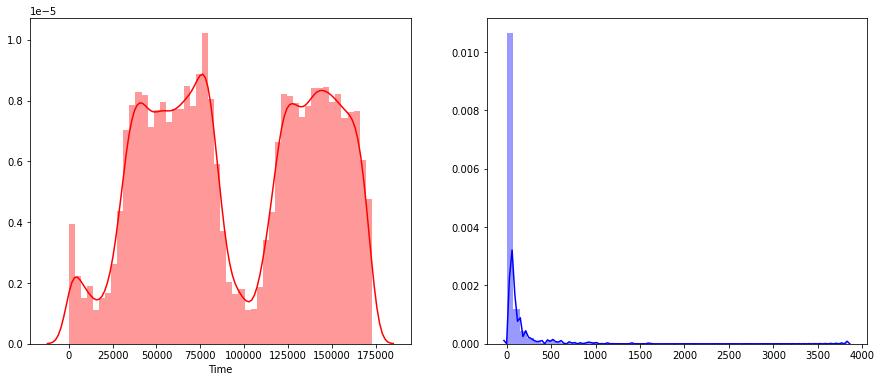

In [15]:
#Check the dsitribution of time and amount features
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(data['Time'],color='red')
plt.subplot(1,2,2)
sns.distplot(sorted(data['Amount'][0:1000]),color='blue')
plt.show()

On EDA of the 'Time' feature, we can see that the number of transactions falls sharply during a particular time interval. There are some regions of time where the number of transactions are very high and there some regions in time where the number of transactions are very low.

On EDA of the 'Amount' features, we see that the distribution is highly skewed towards the left. There are very small number of higher value transactions which happens in the course of 2 days.

In [16]:
#Let us get some basic information about the amount columns
print("The lowest transaction amount is: $",data['Amount'].min())
print("The highest transaction amount is: $",data['Amount'].max())
print("The median transaction amount is: $",data['Amount'].median())
print("The average transaction amount is: $",data['Amount'].mean())

print("\nThe lowest transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].min())
print("The highest transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].max())
print("The median transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].median())
print("The average transaction amount for fraud transaction is: $",data[data.Class == 1]['Amount'].mean())

print("\nThe lowest transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].min())
print("The highest transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].max())
print("The median transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].median())
print("The average transaction amount for non fraud transaction is: $",data[data.Class == 0]['Amount'].mean())

The lowest transaction amount is: $ 0.0
The highest transaction amount is: $ 25691.16
The median transaction amount is: $ 22.0
The average transaction amount is: $ 88.34961925087359

The lowest transaction amount for fraud transaction is: $ 0.0
The highest transaction amount for fraud transaction is: $ 2125.87
The median transaction amount for fraud transaction is: $ 9.25
The average transaction amount for fraud transaction is: $ 122.21132113821133

The lowest transaction amount for non fraud transaction is: $ 0.0
The highest transaction amount for non fraud transaction is: $ 25691.16
The median transaction amount for non fraud transaction is: $ 22.0
The average transaction amount for non fraud transaction is: $ 88.29102242225574


In [0]:
#Colum standardize the time and amount column
from sklearn.preprocessing import StandardScaler
data["Norm_Time"]=StandardScaler().fit_transform(data['Time'].values.reshape(-1,1))
data["Norm_Amount"]=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(["Amount","Time"], axis=1)

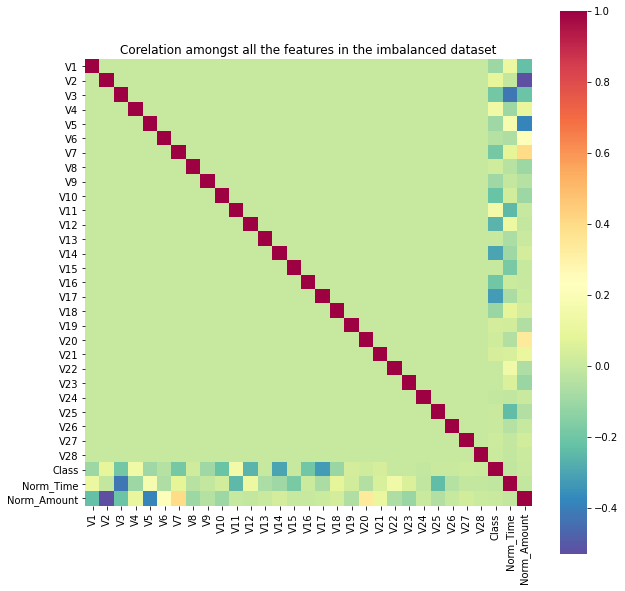

In [18]:

#Get Corelation Matrix between all the features present in the data
cor_matr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the imbalanced dataset')
plt.show()

Using seaborn we can draw corelation heatmaps which are basically same as corelation matrices. In case of a corelation heatmaps we will use color codings instead of corelation coefficient values to determine whether features have a positive or a negative corelation. A red color indicates the features have a strong positive corelation between them and a blue color indicates that two features have a strong negative corelation between themeselves.

In [0]:
#Implement LOF for the imabalanced data set and get information about class 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score, recall_score
import gc
X=data.drop(['Class'],axis=1)
y_actual=data['Class'].values

neighbors=[10,20,30,50,70,100,150,200,300, 350, 400, 450, 500, 600]
recall_scores=[]
for n in neighbors:
    model=LocalOutlierFactor(n_neighbors=n,n_jobs=-1,contamination=fraud/total)
    y_pred = model.fit_predict(X)
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    score=recall_score(y_actual,y_pred)
    recall_scores.append(score)
    print("\nRecall scores for neighbors = {} is = {}".format(n,score))
    print("Accuracy scores for neighbors = {} is = {}".format(n,accuracy_score(y_actual,y_pred)))
    gc.collect()


Recall scores for neighbors = 10 is = 0.0
Accuracy scores for neighbors = 10 is = 0.9965450287387599

Recall scores for neighbors = 20 is = 0.0
Accuracy scores for neighbors = 20 is = 0.9965450287387599


**Under-sample the dataset to balance the classes**

Since the dataset is highly imbalanced there are broadly two strategies we will follow to correctly sample our dataset - under-sampling the dataset and over-sampling the dataset.

In this section we will use a data under-sampling technique where we will sample the data based on the number of instances we have in our minority class. In order to create the final dataset, we will take equal number of sample from both the classes, concatenate them into a single dataset and perform random shuffling to shuffle the data. The resultant dataset will contain 50% points from each of the classes.

Under-sampling helps us get rid of the problem of data imbalanced, but at the same time we are discarding huge amount of data to build our models. We can negate this by using certain data over sampling strategies. In a later section, we will implement something called SMOTE algorithm - a technique used to oversample an imbalanced dataset by adding synthetic points. We will discuss about SMOTE when we implement it.

In [0]:
state=48

In [0]:
#Number of data_fraudulent transaction in the whole data
data_fraud=data[data['Class']==1]
data_valid=data[data['Class']==0].sample(data_fraud.shape[0],random_state=state)
data_under=pd.concat([data_fraud,data_valid])

#We will shuffle our dataset after concatenating
data_under = data_under.sample(frac=1).reset_index(drop=True)
data_under.head()

In [0]:
#Check the class distribution in the given data
data_under['Class'].value_counts().plot(figsize=(6,6),kind='bar')
plt.title("Distribution of class labels")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()


As we can see, the distribution of class labels is almost equal after we have under-sampled the dataset. This under-sampled dataset now contains 50% class labels from the fraudulent class and 50% class labels from the non fraudulent class.

In [0]:
#Get percentage fradulent information in the balanced dataset
not_fraud=data_under[data_under['Class']==0].shape[0]
fraud=data_under[data_under['Class']==1].shape[0]
total=fraud+not_fraud

print("Percentage of Fradulent transaction: {}".format(np.round(100*fraud/total,4)))
print("Percentage of Non Fradulent transaction: {}".format(np.round(100*not_fraud/total,4)))

In [0]:
#Get Corelation Matrix between all the features present in the under sampled data
cor_matr = data_under.corr()
plt.figure(figsize=(10,10))
sn.heatmap(cor_matr,square='True',cmap='Spectral_r')
plt.title('Corelation amongst all the features in the balanced dataset')
plt.show()

In the corelation heatmap above, we can see that there are some features like V2, V4, V11, V19 which has a strong positive corelation to the class label. This means as the value of these features increases, there is a higher chance that a transaction will be fraudulent one.

The features V3, V10, V12, V14 and V16 seems to have a higher negative corelation to the class labels. This means as these value decreases there is a higher chance that a transaction will be a fraudulent one.

In [0]:
#Check the distribution of all the independent variables for the under sampled dataset
data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).hist(bins=200,color='red',figsize=(25,50),layout=(8,4))
plt.show()

In [0]:
features=[i for i in data_under.drop(['Class','Norm_Amount','Norm_Time'],axis=1).columns]
len(features)

**Box Plots**

What is a box-plot and why is it useful?

Box plot is a very powerful statistical tool which can be used to represent statistical information like median, quantiles and inter-quartile range in a single plot.

In [0]:
#Draw box plots of all the features
plt.figure(figsize=(14, 8))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,40))

i_ax=0
for i in range(len(features[0:4])):
    sn.boxplot(x="Class", y=features[i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[i]))
    
i_ax=1
for i in range(len(features[4:8])):
    sn.boxplot(x="Class", y=features[4+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[4+i]))
    
i_ax=2
for i in range(len(features[8:12])):
    sn.boxplot(x="Class", y=features[8+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[8+i]))
    
i_ax=3
for i in range(len(features[12:16])):
    sn.boxplot(x="Class", y=features[12+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[12+i]))
    
i_ax=4
for i in range(len(features[16:20])):
    sn.boxplot(x="Class", y=features[16+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[16+i]))
    
i_ax=5
for i in range(len(features[20:24])):
    sn.boxplot(x="Class", y=features[20+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[20+i]))
    
i_ax=6
for i in range(len(features[24:28])):
    sn.boxplot(x="Class", y=features[24+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[24+i]))
    
i_ax=7
for i in range(len(features[28:32])):
    sn.boxplot(x="Class", y=features[28+i], data=data_under, ax=axes[i_ax,i])
    axes[i_ax,i].set_title('Class vs {}'.format(features[28+i]))
    
plt.show()

**PDF Distribution**

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V1'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V1'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V2'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V2'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V3'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V3'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V4'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V4'][0:] , label = "0" , color = 'blue' )

plt.show()

Here we can see that for features V1, V2, V3 and V4 the class distributions are partially separable. All the distributions are highly skewed. For V4, there is more partial separatability as compared to the other features.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V5'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V5'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V6'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V6'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V7'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V7'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V8'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V8'][0:] , label = "0" , color = 'blue' )

plt.show()


For V5 and V6, the class distributions are partially separable. For V7 and V8 the class distributions are almost overlapping and there is no clear way of separating these features based on their class labels.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V9'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V9'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V10'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V10'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V11'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V11'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V12'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V12'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again, we see a lot of partial separability between the class labels for all four of these features.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V13'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V13'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V14'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V14'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V15'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V15'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V16'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V16'][0:] , label = "0" , color = 'blue' )

plt.show()

V13, V15 features are highly overlapping as far as their class label is concerned. V14 and V16 features has some partial separability as far as their class label is concerned.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V17'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V17'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V18'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V18'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V19'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V19'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V20'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V20'][0:] , label = "0" , color = 'blue' )

plt.show()


Here the spread of the fraudulent class is more as compared to the spread in non fraudulent class.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V21'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V21'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V22'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V22'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V23'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V23'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V24'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V24'][0:] , label = "0" , color = 'blue' )

plt.show()


The class distribution of these features - V21, V22, V23 and V24 are completely inseparable. The distributions are highly overlapping with no way to separate the class labels.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,4,1)
sn.distplot(data_under[data_under['Class'] == 1]['V25'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V25'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,2)
sn.distplot(data_under[data_under['Class'] == 1]['V26'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V26'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,3)
sn.distplot(data_under[data_under['Class'] == 1]['V27'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V27'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,4,4)
sn.distplot(data_under[data_under['Class'] == 1]['V28'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['V28'][0:] , label = "0" , color = 'blue' )

plt.show()

Here again we see that these features cannot be separated well based on their class labels. The class distributions are highly overlapping.

In [0]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Time'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Time'][0:] , label = "0" , color = 'blue' )

plt.subplot(1,2,2)
sn.distplot(data_under[data_under['Class'] == 1]['Norm_Amount'][0:] , label = "1", color = 'red')
sn.distplot(data_under[data_under['Class'] == 0]['Norm_Amount'][0:] , label = "0" , color = 'blue' )


plt.show()

**Splitting the data into train and test datasets**

Before building our machine learning models, we will split the dataset in such a way that 80% of the undersample data goes to our training set and 20% data from the undersampled class goes to our test set. We will make use of the 'stratify' argument to make sure we have equal distribution of class labels in both the training as well as test sets.

After the initial splitting, we have 787 points in our training dataset and 197 points in our test dataset. We will build machine learning models using these 787 points and then evaluate the performance of each of our models on the test set.

In [0]:
from sklearn.model_selection import train_test_split

X=data_under.drop("Class", axis=1)
y=data_under['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=state)

print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])

**Check the distribution of train and test data after splitting the original dataset**

This is a sanity check we need to perform to check if the distribution of class labels is same in both the training as well as the test set. We can see that in both the train as well as the test sets, the class labels are distributed almost equally at 50% data points from each of the classes.

In [0]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()

my_colors = ["b","g"]
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')
    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of labels in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')


**Dimensionality reduction using TSNE**

T-SNE stands for t-distributed Stochastic Neighbor Embedding.

T-SNE is a tool which is used to visualize high dimensional data in 2 or 3 dimensions. In this section we will try to visualize the high dimensional data in a 2D plot. T-SNE tries to preserve the neighborhood distances between each of the data points when we project them onto a lower dimensional space. We will try plotting the T-SNE with various values of perplexities and see if the resultant plot can separate the positive and negative classes well.

In [0]:
from MulticoreTSNE import MulticoreTSNE as TSNE
def tsne(dataset, labels, perplexity):
    labels=labels.apply(lambda x: 'Fraud' if x==1.0 else 'Not Fraud')
    '''This function is used to plot the t-sne for any input dataset using their corresponding class labels,
    using two dimensions.'''
    
    #Starting TSNE dataset transform
    model = TSNE(n_components=2, init='random', random_state=0, verbose=2, n_jobs=-1, angle=0.5, method='barnes_hut', perplexity=perplexity, n_iter=2000)
    tsne_data = model.fit_transform(dataset)

    #Creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Transaction Type"))
    
    #Info
    print("\nT-SNE Plot for perplexity = {}".format(perplexity))
    
    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="Transaction Type", height=6).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
    plt.show()

Observations:

Here we have run the algorithm for various values of perplexities. Perplexity values basically tells the T-SNE algorithm the number of neighborhood distances it should preserve. Here we can see that T-SNE plots are able to accurately cluster the data points at various values of perplexity based on whether or not they are fraudulent transactions. A partial separability suggest that our Machine Learning models should perform well on the given dataset.

**Dimensionality Reduction using PCA**

In [0]:
#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()


**Functioin to plot Confusion Matrix, Precision Matrix, Recall Matrix**

We will use this function to draw the confusion matrix, precision matrix and the recall matrix. We will use the confusion matrix to keep an eye on the false positive values and the recall values. Our main objective of this case study is to build a model which has a high recall value.

Confusion Matrix is a tool which helps us to evaluate the performance of our classification model on unseen data. It's a very important tool to evaluate metrics such as Precision, Recall, Accuracy and Area under the ROC curve using these four values - False Positives (FP), False Negatives (FN), True Positives (TP) and True Negatives (TN).

Let us understand these four metrics in a bit more detail with regards to the given problem.

True Positives (TP): Here the model has predicted the transaction to be fraudulent and in real life the transaction is fraudulent.

True Negatives (TN): Here the model has predicted a transaction to be a non-fraudulent one and in real life the transaction is non-fraudulent.

False Positives (FP): Here the model has predicted the transactions to be fraudulent whereas in real life the given transaction is not fraudulent. These are also known as Type 1 errors.

False Negatives (FN): Here the model has predicted the transactions to be non-fraudulent where as in real life the transactions are fraudulent. These are also known as Type 2 errors.

Ideally, for a perfect model, we would want the values of TPs and TNs to be very high and our FPs and FNs to be very low. Also, for this problem it's an absolute necessity to keep the False Negative values as low as possible. In the real world Type 2 errors are much more sever than Type 1 errors. Imagine this scenario - our model predicts a fraudulent transaction as a non fraudulent one. This is much more severe than predicting a non-fraudulent transaction as a fraudulent one.

Recall tells us that out of the total number of actual/correctly classified classes how many did our model predicted to belong to the correctly classified class?

Precision tells us that out of the total number of predictions how many of them are actually predicted to be true?

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sn.light_palette("blue")
    plt.subplot(1, 3, 1)
    sn.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sn.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sn.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

**Function to plot the ROC-AUC Curve**

ROC curve stands for Receiver operating characteristic curve. In machine learning, ROC curves helps us evaluate our models performance at various threshold settings. ROC curves is a probability curve and AUC stands for the area under the ROC curve. Generally a ROC-AUC curves gives us an idea about how well our model is capable of distinguishing between various class labels. IN ROC-AUC curve, the value of the true positive rates and false positive rates are plotted against each other at various threshold settings. Higher the value of an ROC-AUC curve, the better will be our model in predicting a class 0 label as class 0 and class 1 label as class 1. For this case study, class 1 signifies a fraudulent transaction and class 0 signifies a non-fraudulent transaction.

While plotting the ROC-AUC curve, the TPR is taken in Y-Axis and the FPR is taken at X-axis. TPR is also known ans Recall. Mathematically TPR is defined as (TP/TP+FN), and FPR is defined as (FP/TN+FP). We will have to optimize our Machine Learning models such that they maximize the ROC-AUC score.

In [0]:
#This function is used to plot the ROC curve on both train and test.
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def plot_roc_curve(classifier, X_train, y_train, X_test, y_test):
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    '''TEST DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    fpr["Test"], tpr["Test"], threshold = roc_curve(y_test, y_probs)
    roc_auc["Test"] = auc(fpr["Test"], tpr["Test"])
    
    '''TRAIN DATA ROC CURVE'''
    #Use probability scores to compute the ROC Curve
    class_probabilities = classifier.predict_proba(X_train)
    y_probs = class_probabilities[:,1]
    fpr["Train"], tpr["Train"], threshold = roc_curve(y_train, y_probs)
    roc_auc["Train"] = auc(fpr["Train"], tpr["Train"])
    
    plt.figure(figsize=(15,10))
    linewidth = 2
    plt.plot(fpr["Test"], tpr["Test"], color='green', lw=linewidth, label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"])
    plt.plot(fpr["Train"], tpr["Train"], color='red', lw=linewidth, label='ROC curve Train Data (area = %0.2f)' % roc_auc["Train"])
    plt.plot([0, 1], [0, 1], color='navy', lw=linewidth, linestyle='--', label='Baseline ROC curve (area = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

**Generic function to run any model and print the classification metrics**

This function is used to evaluate our model on unseen data. We will first obtain the best estimator using either grid search or random search. We will use the best estimator from our model to print the roc-auc scores, the accuracy scores, the recall score and the f1 score. F1 score as we know is the harmonic mean between precision and recall scores. We will also use this function to generate the classification report for each of our models.

In [0]:
def model_report(rsearch_cv, X_train, y_train, X_test, y_test, class_labels):
    
    #To store results at various phases during training as well as cross validation stages
    results = dict()
    model = rsearch_cv.best_estimator_
    
    #Time at which model starts training 
    train_start_time = dt.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    print('Training completed... \n \n')
    train_end_time = dt.now()
    results['Training_Time'] =  train_end_time - train_start_time
    print('Training Time (HH:MM:SS.ms) -- {}\n\n'.format(results['Training_Time']))
    
    
    #Predict the test data
    print('Predicting test data...')
    test_start_time = dt.now()
    y_pred = model.predict(X_test)
    test_end_time = dt.now()
    print('Predicting test data completed... \n \n')
    results['Testing_Time'] = test_end_time - test_start_time
    print('Testing Time(HH:MM:SS:ms) -- {}\n\n'.format(results['Testing_Time']))
    results['Predicted'] = y_pred
   

    #Compute the F1 score 
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred, average='micro') #F1 = 2 * (precision * recall) / (precision + recall)
    
    #Store F1 Score in results
    results['F1_Score'] = f1_score
    print('---------------------')
    print('|      F1 Score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))      
    

    #Calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    #Calculate overall recall_score of the model
    recall = metrics.recall_score(y_true=y_test, y_pred=y_pred)
        
    #Store the accuracy in results
    results['Recall'] = recall
    print('---------------------')
    print('|      Recall        |')
    print('---------------------')
    print('\n    {}\n\n'.format(recall))
    
    #Calculate overall roc-auc of the model
    #Calibrate the model
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    class_probabilities = sig_clf.predict_proba(X_test)
    y_probs = class_probabilities[:,1]
    roc_auc = metrics.roc_auc_score(y_true=y_test, y_score=y_probs)
        
    #Store the ROC-AUC in results
    results['ROC-AUC'] = roc_auc
    print('---------------------')
    print('|      ROC AUC       |')
    print('---------------------')
    print('\n    {}\n\n'.format(roc_auc))   
                   
    #Display the classification report having individual class recalls and precision values.
    print('-------------------------')
    print('| Classifiction Report  |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    #Store report in results
    results['Classification_Report'] = classification_report
    print(classification_report)
    
    #Add the trained  model to the results
    results['Model'] = model
    
    #Plot the confusion matrix curve
    plot_confusion_matrix(y_test, y_pred)
    
    return results, model

**Generic function to print grid/random search results/attributes**

This function will be used to print the best estimator obtained using grid search/random search. For each estimator, we will print the best parameters for a given function along with their best scores on the cross validation dataset.

In [0]:
def print_grid_search_attributes(model):
    #Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    #Parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))

    #Number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))

    #Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))